<a href="https://colab.research.google.com/github/dianatuyen/DS-3001-project_chd/blob/main/Project_2_%E2%80%94_CHD_Project_(Group_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount GitHub (Anna)
! git clone https://github.com/DS3001/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 4), reused 2 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 635.72 KiB | 2.97 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [50]:
# Import dependencies (Anna)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Import training data (Anna)
df = pd.read_csv('/content/project_chd/fhs_train.csv')

In [81]:
# View summary information of dataframe to check for missing values (Anna)
df.describe()

# Missing values in the following columns: education, cigsPerDay, BPMeds, totChol, BMI, glucose

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [53]:
# Create a dummy variable for each column with missing values, where 1 indicates the value is missing (Anna)
df['education_missing'] = np.where(df['education'].isnull(), 1, 0)
df['cigsPerDay_missing'] = np.where(df['cigsPerDay'].isnull(), 1, 0)
df['BPMeds_missing'] = np.where(df['BPMeds'].isnull(), 1, 0)
df['totChol_missing'] = np.where(df['totChol'].isnull(), 1, 0)
df['BMI_missing'] = np.where(df['BMI'].isnull(), 1, 0)
df['glucose_missing'] = np.where(df['glucose'].isnull(), 1, 0)

# Display df
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,BMI,heartRate,glucose,TenYearCHD,education_missing,cigsPerDay_missing,BPMeds_missing,totChol_missing,BMI_missing,glucose_missing
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,...,29.85,75,87.0,1,0,0,0,0,0,0
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,...,22.16,85,77.0,0,0,0,0,0,0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,...,25.68,80,NaN,0,0,0,0,0,0,1
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,...,23.90,110,75.0,0,0,0,0,0,0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,...,21.26,75,74.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,...,26.78,58,100.0,0,0,0,0,0,0,0
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,...,27.33,73,61.0,0,0,0,0,0,0,0
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,...,29.51,64,74.0,1,0,0,0,0,0,0
3178,733,0,48,1.0,1,5.0,0.0,0,0,0,...,24.59,70,78.0,0,0,0,0,0,0,0


In [ ]:
# Check for missing values (Elle) (negate this)
print(df['sex'].isna().sum()) #0
print(df['age'].isna().sum())
print(df['education'].isna().sum()) #85
print(df['currentSmoker'].isna().sum())
print(df['cigsPerDay'].isna().sum()) #24
print(df['BPMeds'].isna().sum()) #37
print(df['prevalentStroke'].isna().sum())
print(df['diabetes'].isna().sum())
print(df['totChol'].isna().sum()) #39
print(df['sysBP'].isna().sum())
print(df['diaBP'].isna().sum())
print(df['BMI'].isna().sum()) #15
print(df['heartRate'].isna().sum())
print(df['glucose'].isna().sum()) #285
print(df['TenYearCHD'].isna().sum())

0
0
85
0
24
37
0
0
39
0
0
15
0
285
0


In [82]:
#Drop missing values of the variables with NaN (Elle)
df.dropna(subset=['education'], inplace=True)
df.dropna(subset=['cigsPerDay'], inplace=True)
df.dropna(subset=['BPMeds'], inplace=True)
df.dropna(subset=['totChol'], inplace=True)
df.dropna(subset=['BMI'], inplace=True)
df.dropna(subset=['glucose'], inplace=True)

# I don't think we should drop all missing values (Anna)

In [83]:
# Review dataframe (Elle)
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
6,1054,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,3367,0,54,2.0,0,0.0,0.0,0,1,0,320.0,165.0,84.0,38.31,80,99.0,0
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,234.0,133.0,88.0,26.78,58,100.0,0
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,284.0,137.0,91.0,27.33,73,61.0,0
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,310.0,135.0,89.0,29.51,64,74.0,1


In [ ]:
# Check data types for each variable in df (Elle)
datatypes=df.dtypes
datatypes

Unnamed: 0              int64
sex                     int64
age                     int64
education             float64
currentSmoker           int64
cigsPerDay            float64
BPMeds                float64
prevalentStroke         int64
prevalentHyp            int64
diabetes                int64
totChol               float64
sysBP                 float64
diaBP                 float64
BMI                   float64
heartRate               int64
glucose               float64
TenYearCHD              int64
education_missing       int64
cigsPerDay_missing      int64
BPMeds_missing          int64
totChol_missing         int64
BMI_missing             int64
glucose_missing         int64
dtype: object

In [85]:
# Convert education variable to integers (Elle)
# doesn't cast properly if not drop all missing values
df['education'] = df['education'].astype(int)

In [55]:
# Map dictionary for edcucation variable (Elle)(Adaire)
education_map={1.0: 'High School',
               2.0: 'High School/ GED',
               3.0: 'College/ Vocational School',
               4.0: 'College'}

# Create categorical column of education
df['education_categorical']=df['education'].map(education_map)
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,heartRate,glucose,TenYearCHD,education_missing,cigsPerDay_missing,BPMeds_missing,totChol_missing,BMI_missing,glucose_missing,education_categorical
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,...,75,87.0,1,0,0,0,0,0,0,High School
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,...,85,77.0,0,0,0,0,0,0,0,High School
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,...,80,NaN,0,0,0,0,0,0,1,High School
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,...,110,75.0,0,0,0,0,0,0,0,High School/ GED
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,...,75,74.0,0,0,0,0,0,0,0,High School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,...,58,100.0,0,0,0,0,0,0,0,College
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,...,73,61.0,0,0,0,0,0,0,0,High School
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,...,64,74.0,1,0,0,0,0,0,0,High School/ GED
3178,733,0,48,1.0,1,5.0,0.0,0,0,0,...,70,78.0,0,0,0,0,0,0,0,High School


In [14]:
# Clarify the map dictionary for the categorical variable of education (Adaire)
education_map={1.0: 'Some High School',
               2.0: 'High School/ GED',
               3.0: 'College/ Vocational School',
               4.0: 'College'}

# Create categorical column of education
df['education_categorical']=df['education'].map(education_map)
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,heartRate,glucose,TenYearCHD,education_missing,cigsPerDay_missing,BPMeds_missing,totChol_missing,BMI_missing,glucose_missing,education_categorical
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,...,75,87.0,1,0,0,0,0,0,0,Some High School
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,...,85,77.0,0,0,0,0,0,0,0,Some High School
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,...,80,NaN,0,0,0,0,0,0,1,Some High School
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,...,110,75.0,0,0,0,0,0,0,0,High School/ GED
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,...,75,74.0,0,0,0,0,0,0,0,Some High School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,...,58,100.0,0,0,0,0,0,0,0,College
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,...,73,61.0,0,0,0,0,0,0,0,Some High School
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,...,64,74.0,1,0,0,0,0,0,0,High School/ GED
3178,733,0,48,1.0,1,5.0,0.0,0,0,0,...,70,78.0,0,0,0,0,0,0,0,Some High School


In [56]:
# Map dictionary for categorical variable (Elle)
sex_map={0: 'female',
         1: 'male'}

# Create categorical column of sex
df['sex_categorical']=df['sex'].map(sex_map)
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,glucose,TenYearCHD,education_missing,cigsPerDay_missing,BPMeds_missing,totChol_missing,BMI_missing,glucose_missing,education_categorical,sex_categorical
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,...,87.0,1,0,0,0,0,0,0,High School,male
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,...,77.0,0,0,0,0,0,0,0,High School,female
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,...,NaN,0,0,0,0,0,0,1,High School,female
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,...,75.0,0,0,0,0,0,0,0,High School/ GED,male
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,...,74.0,0,0,0,0,0,0,0,High School,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,...,100.0,0,0,0,0,0,0,0,College,male
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,...,61.0,0,0,0,0,0,0,0,High School,male
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,...,74.0,1,0,0,0,0,0,0,High School/ GED,male
3178,733,0,48,1.0,1,5.0,0.0,0,0,0,...,78.0,0,0,0,0,0,0,0,High School,female


In [57]:
# Map dictionary for categorical variable (Elle)
prevStroke_map={0: 'free of disease',
         1: 'has disease'}

# Create categorical column of prevalent stroke (Elle)
df['prevStroke_categorical']=df['prevalentStroke'].map(prevStroke_map)
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,TenYearCHD,education_missing,cigsPerDay_missing,BPMeds_missing,totChol_missing,BMI_missing,glucose_missing,education_categorical,sex_categorical,prevStroke_categorical
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,High School,male,free of disease
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,...,0,0,0,0,0,0,0,High School,female,free of disease
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,High School,female,free of disease
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,...,0,0,0,0,0,0,0,High School/ GED,male,free of disease
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,High School,female,free of disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,College,male,free of disease
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,...,0,0,0,0,0,0,0,High School,male,free of disease
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,High School/ GED,male,free of disease
3178,733,0,48,1.0,1,5.0,0.0,0,0,0,...,0,0,0,0,0,0,0,High School,female,free of disease


In [58]:
# Map dictionary for categorical variable of current smoker (Adaire)
smoker_map={0: 'no',
         1: 'yes'}

# Create categorical column representing smoking status
df['smoking_status']=df['currentSmoker'].map(smoker_map)
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,education_missing,cigsPerDay_missing,BPMeds_missing,totChol_missing,BMI_missing,glucose_missing,education_categorical,sex_categorical,prevStroke_categorical,smoking_status
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,High School,male,free of disease,no
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,...,0,0,0,0,0,0,High School,female,free of disease,yes
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,High School,female,free of disease,no
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,...,0,0,0,0,0,0,High School/ GED,male,free of disease,yes
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,High School,female,free of disease,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,College,male,free of disease,no
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,...,0,0,0,0,0,0,High School,male,free of disease,yes
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,High School/ GED,male,free of disease,no
3178,733,0,48,1.0,1,5.0,0.0,0,0,0,...,0,0,0,0,0,0,High School,female,free of disease,yes


In [59]:
# Map dictionary for categorical variable of diabetic status (Adaire)
diabetic_map={0: 'no',
         1: 'yes'}

# Create categorical column representing disease status of diabetes
df['isdiabetic']=df['diabetes'].map(diabetic_map)
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,cigsPerDay_missing,BPMeds_missing,totChol_missing,BMI_missing,glucose_missing,education_categorical,sex_categorical,prevStroke_categorical,smoking_status,isdiabetic
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,High School,male,free of disease,no,no
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,...,0,0,0,0,0,High School,female,free of disease,yes,no
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,High School,female,free of disease,no,no
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,...,0,0,0,0,0,High School/ GED,male,free of disease,yes,no
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,High School,female,free of disease,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,College,male,free of disease,no,no
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,...,0,0,0,0,0,High School,male,free of disease,yes,no
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,High School/ GED,male,free of disease,no,no
3178,733,0,48,1.0,1,5.0,0.0,0,0,0,...,0,0,0,0,0,High School,female,free of disease,yes,no


In [86]:
# make a correlation matrix: which variable strongly correlated with the likelihood of developing CHD (carol)
# I dropped all NA, and did not include mapping (no categorical or missing vars)
df.corr()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Unnamed: 0,1.000000,0.028931,-0.002386,0.005264,0.002710,-0.001035,0.017034,0.028704,0.013487,0.047521,-0.015130,-0.011637,-0.009130,0.002843,0.042875,0.032617,-0.012562
sex,0.028931,1.000000,-0.030139,0.005061,0.205028,0.336615,-0.044798,0.012356,0.008453,0.016438,-0.076235,-0.034453,0.057362,0.074355,-0.111224,0.013454,0.100394
age,-0.002386,-0.030139,1.000000,-0.166460,-0.212695,-0.195504,0.128098,0.056119,0.294195,0.097253,0.269450,0.386833,0.208598,0.143422,-0.010926,0.103984,0.233327
education,0.005264,0.005061,-0.166460,1.000000,0.019864,0.008876,-0.015253,-0.024027,-0.073242,-0.042965,-0.015273,-0.126289,-0.059369,-0.150767,-0.085380,-0.039952,-0.058663
currentSmoker,0.002710,0.205028,-0.212695,0.019864,1.000000,0.770227,-0.057604,-0.039969,-0.107898,-0.031604,-0.027983,-0.140898,-0.115857,-0.176905,0.047681,-0.056631,0.007957
cigsPerDay,-0.001035,0.336615,-0.195504,0.008876,0.770227,1.000000,-0.048006,-0.034373,-0.071204,-0.032327,-0.017445,-0.096031,-0.050059,-0.094391,0.067819,-0.059574,0.050614
BPMeds,0.017034,-0.044798,0.128098,-0.015253,-0.057604,-0.048006,1.000000,0.121645,0.255967,0.047991,0.088243,0.267308,0.207486,0.093656,-0.005011,0.031285,0.095222
prevalentStroke,0.028704,0.012356,0.056119,-0.024027,-0.039969,-0.034373,0.121645,1.000000,0.054817,-0.013326,0.005556,0.060481,0.050653,0.014946,-0.024515,0.000245,0.043344
prevalentHyp,0.013487,0.008453,0.294195,-0.073242,-0.107898,-0.071204,0.255967,0.054817,1.000000,0.083085,0.163553,0.689293,0.617183,0.308250,0.145399,0.084884,0.168785
diabetes,0.047521,0.016438,0.097253,-0.042965,-0.031604,-0.032327,0.047991,-0.013326,0.083085,1.000000,0.052329,0.094032,0.044307,0.086245,0.054426,0.607184,0.099882


According to correlation matrix, age (0.23), sysBP(0.21),prevalentHyp (0.17,boolean),diaBP(0.14), glucose (0.12), diabetes (0.10,boolean) are the most strongly correlated variables with TenYearCHD. (carol)

In [87]:
# check dummy variable (boolean), compute a summary table of TenYearCHD grouped by the variable. (carol)
# For which variables does a higher proportion of the population have CHD in ten years when the variable takes the value 1 rather than 0?
dummy_var = ['sex', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes','BPMeds']
for var in dummy_var:
  print(df.loc[:,[var,'TenYearCHD']].groupby(var).describe())

    TenYearCHD                                             
         count      mean       std  min  25%  50%  75%  max
sex                                                        
0       1505.0  0.121595  0.326926  0.0  0.0  0.0  0.0  1.0
1       1239.0  0.194512  0.395984  0.0  0.0  0.0  0.0  1.0
              TenYearCHD                                             
                   count      mean       std  min  25%  50%  75%  max
currentSmoker                                                        
0                 1404.0  0.151709  0.358867  0.0  0.0  0.0  0.0  1.0
1                 1340.0  0.157463  0.364372  0.0  0.0  0.0  0.0  1.0
                TenYearCHD                                             
                     count      mean       std  min  25%  50%  75%  max
prevalentStroke                                                        
0                   2727.0  0.153282  0.360325  0.0  0.0  0.0  0.0  1.0
1                     17.0  0.352941  0.492592  0.0  0.0  0.0 

For all except current smoker the mean for 0 is much lower than 1, indicating a higher proportion of the population die when these boolean variables take the value of 1 rather than 0.

In [60]:
# check missing variables (boolean), compute a summary table of TenYearCHD grouped by the variable. (carol)
# For which variables does a higher proportion of the population have CHD in ten years when the variable takes the value 1 rather than 0?
missing_var = ['education_missing', 'cigsPerDay_missing', 'BPMeds_missing', 'totChol_missing', 'BMI_missing','glucose_missing']
for var in missing_var:
  print(df.loc[:,[var,'TenYearCHD']].groupby(var).describe())

                  TenYearCHD                                             
                       count      mean       std  min  25%  50%  75%  max
education_missing                                                        
0                     3095.0  0.154120  0.361122  0.0  0.0  0.0  0.0  1.0
1                       85.0  0.117647  0.324102  0.0  0.0  0.0  0.0  1.0
                   TenYearCHD                                             
                        count      mean       std  min  25%  50%  75%  max
cigsPerDay_missing                                                        
0                      3156.0  0.153676  0.360695  0.0  0.0  0.0  0.0  1.0
1                        24.0  0.083333  0.282330  0.0  0.0  0.0  0.0  1.0
               TenYearCHD                                             
                    count      mean       std  min  25%  50%  75%  max
BPMeds_missing                                                        
0                  3143.0  0.152084  0.359

For BPMeds_missing and BMI_missing, the mean for 0 is much lower than 1, indicating a higher proportion of the population die when the two variables are missing (takes the value of 1 rather than 0).

In [88]:
#On the basis of corr matrix and dummy var summary table, (carol)
# build a matrix  𝑋  of the variables most predictive of a death, and a variable  𝑦  equal to TenYearCDH.
vars = ['sex','prevalentStroke', 'prevalentHyp', 'diabetes','BPMeds','age','sysBP','diaBP','glucose']
X = df.loc[:,vars]
y = df['TenYearCHD']

In [89]:
# Maxmin normalize all of the variables in X (carol)
def maxmin(arr):
  norm_arr = (arr-min(arr))/(max(arr)-min(arr))
  return norm_arr

X=X.apply(maxmin)

In [90]:
# Split the sample into ~80% for training and ~20% for evaluation (carol)

np.random.seed(100) #get the same sequence of random numbers
N = X.shape[0] #assigns the number of rows in X to the variable N
all = np.arange(1,N) #all containing integers from 1 to N-1
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[41]


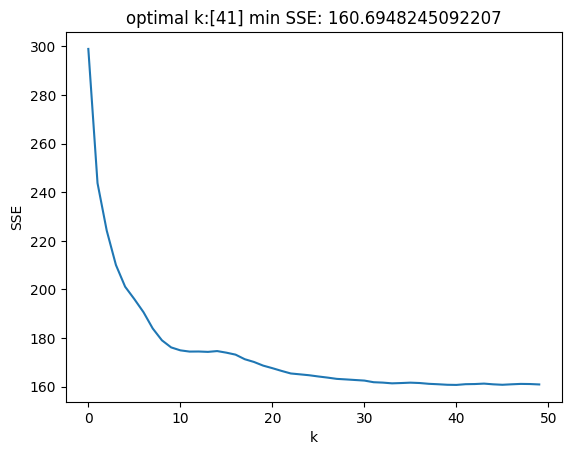

In [92]:
# Determine the optimal number of neighbors for a kNN regression for the variables selected (carol)
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

k_max = 50
k_grid = np.arange(1,k_max)
SSE = np.zeros(k_max)

for k in range(k_max):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_opt = k_grid[min_index] # Find the optimal value of k
print(k_opt)

plt.plot(np.arange(0,k_max),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_opt)+' min SSE: '+str(SSE_min))
plt.ylabel('SSE')
plt.show()